In [1]:
# 13th

import skimage.io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(780, 1280, 3)


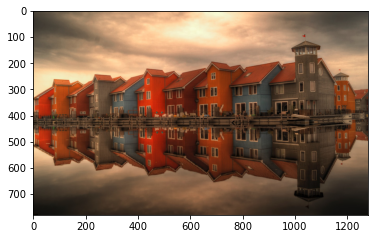

In [3]:
figures = skimage.io.imread("./datasets/images/buildings-cloudy-colorful.jpg")

plt.figure(figsize = (6, 6))
plt.imshow(figures)

print(figures.shape)

(780, 1280)


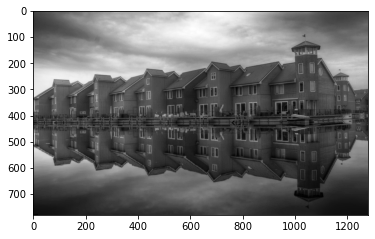

In [5]:
# image in gray
image = skimage.color.rgb2gray(figures)

plt.figure(figsize = (6, 6))
plt.imshow(image, cmap = "gray")

print(image.shape)

In [11]:
# helper to apply conv on image and return the feature map
def apply_convolution(image, kernel):
    input_shape = (1, image.shape[0], image.shape[1], 1)  # format of image xpected by nn(i,e 4d tensor)
    
    input_placeholder = tf.placeholder(dtype = tf.float32, shape = input_shape)
    
    image_4d = image[np.newaxis, :, :, np.newaxis]  # 1, height, width, 1
    
    with tf.name_scope("convolution"):
        conv_w = tf.constant(kernel, dtype = tf.float32, shape = (3, 3, 1, 1))  # filter or kernel(h, w, no ch in input and output)
        
        # conv layer
        output = tf.nn.conv2d(input = input_placeholder,
                             filter = conv_w,
                             stride = [1, 1, 1, 1], padding = "SAME")
        
        with tf.Session() as sess:
            result = sess.run(output,
                             feed_dict = {input_placeholder: image_4d})
            
        return result
        

In [12]:
# helper to display original and image feature map
def display_original_convolutionresult(image, result):
    fig, axes = plt.subplots(1, 2,
                            figsize = (8, 8), sharex = True, sharey=True)
    
    ax = axes.ravel()
    
    ax[0].imshow(image, cmap = "gray")
    
    # set batch and channel to 0 so as to squeeze dem out and have just height and width for opp
    ax[1].imshow(result[0,:,:,0], cmap = "gray")
    plt.tight_layout()
    plt.show()

In [8]:
# kernels to apply to image
kernel_gaussianblur = [ [1/16, 2/16, 1/16],
                      [2/16, 4/16, 2/16],
                      [1/16, 2/16, 1/16]]

In [13]:
result = apply_convolution(image, kernel_gaussianblur)

display_original_convolutionresult(image, result)

AttributeError: module 'tensorflow' has no attribute 'placeholder'